In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


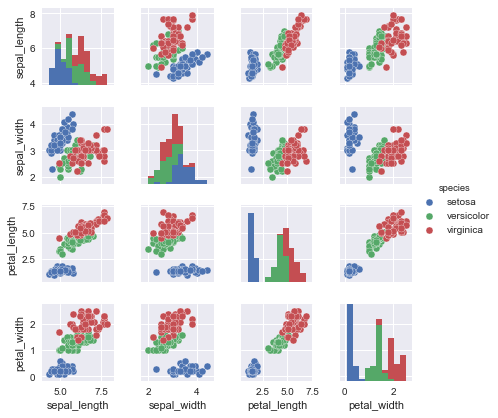

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150L,)

In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

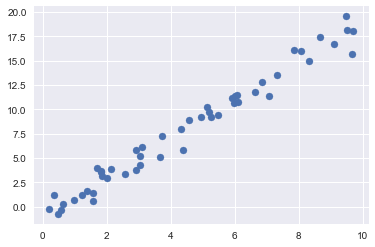

In [8]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y);

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression(fit_intercept=True)

In [11]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
X = x[:, np.newaxis]
X.shape

(50L, 1L)

In [13]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
model.coef_

array([1.9776566])

In [15]:
model.intercept_

-0.9033107255311164

In [16]:
xfit = np.linspace(-1,11)

In [17]:
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

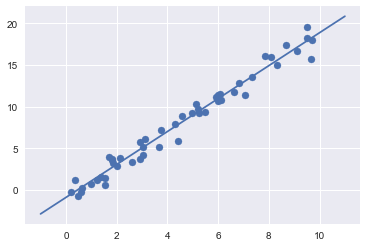

In [18]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Iris Classification

First up split set between test and training

In [19]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

C:\Users\elvislap\Miniconda2\envs\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1)model class 


2)instantiate 


3)fit model 


4)predict 

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Accuracy_score utility

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Iris Dimension Reduction

1) choose model

2) instantiate (hyperparameter determines dimensions

3) fit model

4) do the reduction

In [22]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

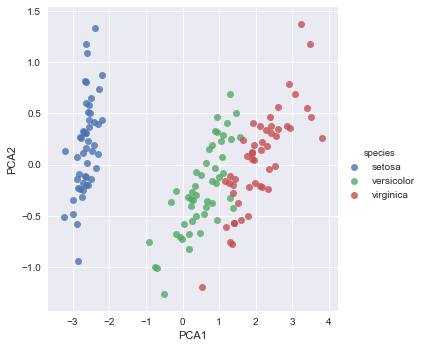

In [23]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

Unsupervised learning: Iris Clustering.

1) choose model class

2) instantiate model - note hyperparameters applied, like the number of cluster nodes

3) train model (fit to data)

4) Predict labels

In [24]:
from sklearn.mixture import GMM
model = GMM(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

C:\Users\elvislap\Miniconda2\envs\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\elvislap\Miniconda2\envs\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\elvislap\Miniconda2\envs\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\elvislap\Miniconda2\envs\lib\site-packages\sklearn\utils\deprec

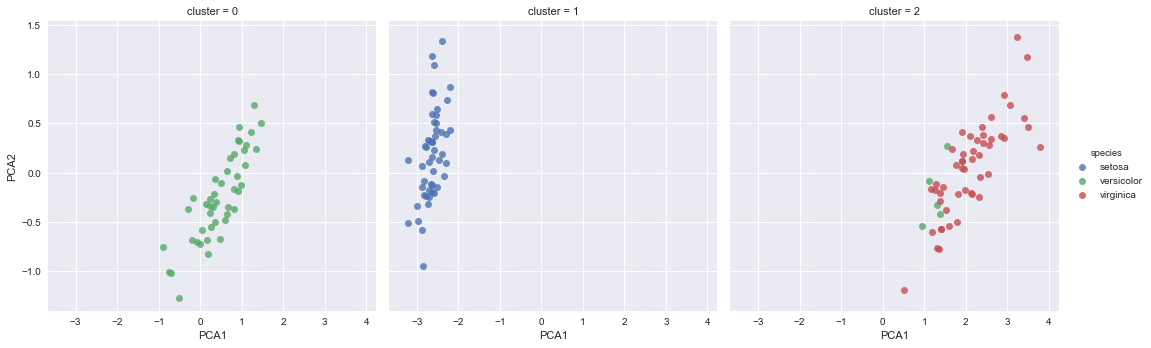

In [25]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

Application: Handwritten Digits

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797L, 8L, 8L)

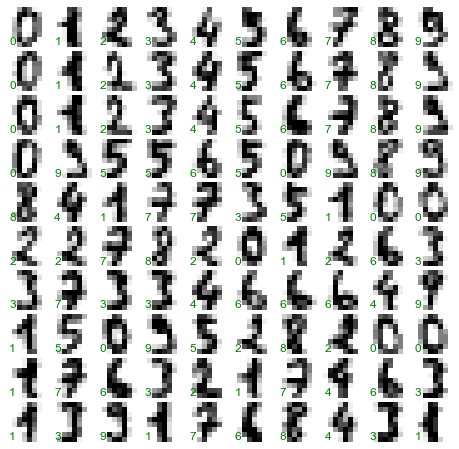

In [27]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

flattening image - 64 -> 2 using Isomap

use target array

In [28]:
X = digits.data
X.shape

(1797L, 64L)

In [29]:
y = digits.target
y.shape

(1797L,)

In [30]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797L, 2L)

C:\Users\elvislap\Miniconda2\envs\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


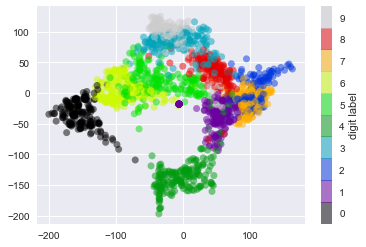

In [31]:
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target,
           edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5,9.5);

Do the classificaiton. Guassian naive Bayes model.

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Confusion matrix

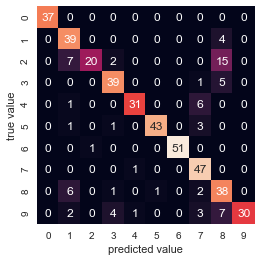

In [36]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

view correct and incorrect predictions.

Green correct, red incorrect in labelling

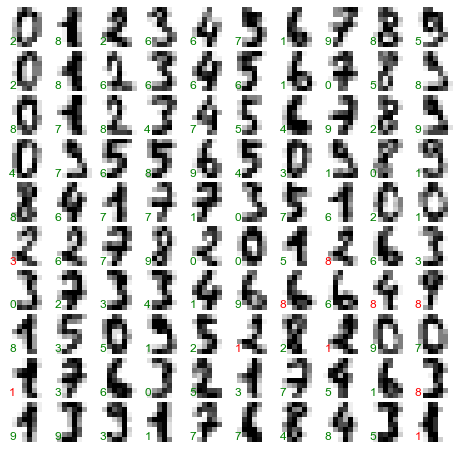

In [37]:
fig, axes = plt.subplots(10,10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i]==y_model[i]) else 'red')